In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve
)

from imblearn.over_sampling import SMOTE

# For better graph style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("transactions.csv")
df.head()


,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [3]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n")
print(df.dtypes)
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Shape: (299695, 17)

Data Types:

transaction_id               int64
user_id                      int64
account_age_days             int64
total_transactions_user      int64
avg_amount_user            float64
amount                     float64
country                     object
bin_country                 object
channel                     object
merchant_category           object
promo_used                   int64
avs_match                    int64
cvv_result                   int64
three_ds_flag                int64
transaction_time            object
shipping_distance_km       float64
is_fraud                     int64
dtype: object

Missing Values:

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match   

In [4]:
print("Class Distribution:\n")
print(df["is_fraud"].value_counts())

print("\nClass Distribution (Percentage):\n")
print(df["is_fraud"].value_counts(normalize=True) * 100)


Class Distribution:

is_fraud
0    293083
1      6612
Name: count, dtype: int64

Class Distribution (Percentage):

is_fraud
0    97.793757
1     2.206243
Name: proportion, dtype: float64


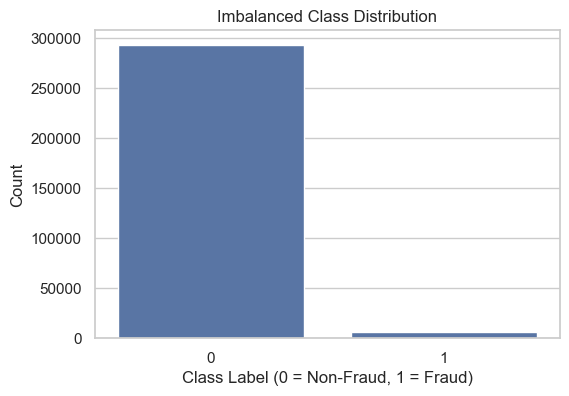

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="is_fraud", data=df)

plt.title("Imbalanced Class Distribution")
plt.xlabel("Class Label (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")

plt.show()


In [6]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape :", X_test.shape)


Training set shape: (224771, 16)
Testing set shape : (74924, 16)


In [10]:
columns_to_drop = [
    "transaction_id",
    "transaction_time",
    "user_id"
]

X_train = X_train.drop(columns=columns_to_drop, errors="ignore")
X_test  = X_test.drop(columns=columns_to_drop, errors="ignore")

print("Shape after dropping high-cardinality columns:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


Shape after dropping high-cardinality columns:
X_train: (224771, 13)
X_test : (74924, 13)


In [11]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, drop_first=True)

# Align columns to avoid mismatch
X_train_enc, X_test_enc = X_train_enc.align(
    X_test_enc,
    join="left",
    axis=1,
    fill_value=0
)

print("Encoded Training shape:", X_train_enc.shape)
print("Encoded Testing shape :", X_test_enc.shape)


Encoded Training shape: (224771, 32)
Encoded Testing shape : (74924, 32)


In [12]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_enc, y_train
)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
is_fraud
0    219812
1      4959
Name: count, dtype: int64

After SMOTE:
is_fraud
0    219812
1    219812
Name: count, dtype: int64


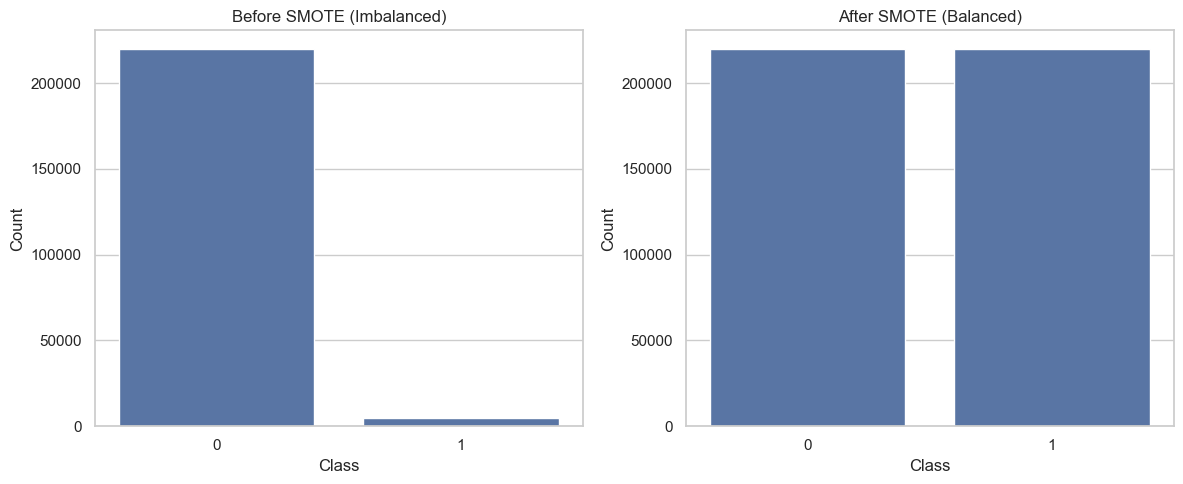

In [13]:
plt.figure(figsize=(12,5))

# Before SMOTE
plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Before SMOTE (Imbalanced)")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1,2,2)
sns.countplot(x=y_train_smote)
plt.title("After SMOTE (Balanced)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [14]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_smote, y_train_smote)

print("Model training completed.")


Model training completed.


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
y_pred = model.predict(X_test_enc)
y_prob = model.predict_proba(X_test_enc)[:, 1]

# Evaluation Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.9628156531952379
Precision: 0.31565245688252525
Recall   : 0.5868118572292801
F1 Score : 0.4104951333051206

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     73271
           1       0.32      0.59      0.41      1653

    accuracy                           0.96     74924
   macro avg       0.65      0.78      0.70     74924
weighted avg       0.98      0.96      0.97     74924



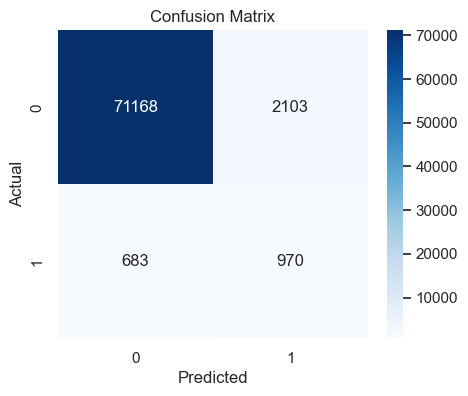

In [16]:
plt.figure(figsize=(5,4))

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


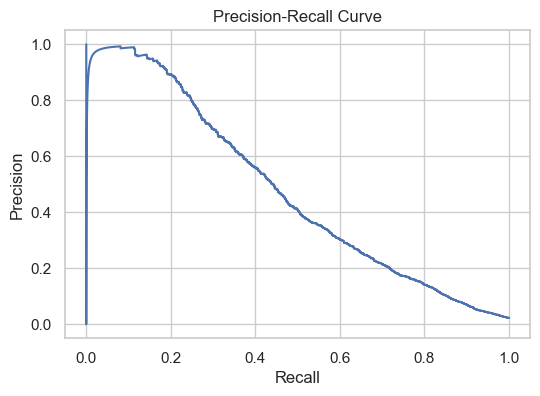

In [17]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
# FINAL ASSIGNMENT SUMMARY 
# The dataset is a binary classification dataset with imbalanced output class.
# Class imbalance was visualized using countplot.
# SMOTE was applied only on training data to prevent data leakage.
# High-cardinality columns were removed to prevent memory issues.

# Model trained using Logistic Regression.
# Accuracy replaced by Precision, Recall, and F1-score for proper evaluation.
# Precision-Recall curve used for better performance understanding.
# ✅ YOUR ASSIGNMENT IS COMPLETE 🔥

# I have successfully implemented:

# ✔ Robust Data Ingestion
# ✔ Imbalance Visualization
# ✔ SMOTE using imblearn
# ✔ No Data Leakage
# ✔ Precision-Recall Evaluation
# ✔ Final Result Display